# Лабораторна робота No 2
## Використання Pandas для аналізу даних

In [1]:
# Варіант
n = 20
N = (n + 4) % 5 + 1
print(N)

5


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("NationalNames.csv")

In [3]:
# Вправа 2 (останні 8 рядків набору даних)
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [4]:
# Вправа 4 (загальна інформація про дані)
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [5]:
# Вправа 6 (кількість унікальних жіночих та чоловічих імен)
unique_names_counts = df.groupby('Gender')['Name'].nunique()

unique_names_counts

Gender
F    64911
M    39199
Name: Name, dtype: int64

In [6]:
# Вправа 7 (5 найпопулярніших чоловічих імен у 2010 році)
df[(df['Year'] == 2010) & (df['Gender'] == 'M')].head()

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [7]:
# Вправа 9 (кількість записів, для яких Count - мінімальне у наборі)
min_count = df['Count'].min()

min_count_records = df[df['Count'] == min_count]
len(min_count_records)

254615

In [21]:
# Вправа 10 (кількість унікальних імен у кожному році)
unique_names_per_year = df.groupby('Year')['Name'].nunique()

unique_names_per_year.head(10)

Year
1880    1889
1881    1830
1882    2012
1883    1962
1884    2158
1885    2139
1886    2225
1887    2215
1888    2454
1889    2390
Name: Name, dtype: int64

In [9]:
# Вправа 15 (загальна кількість народжень за рік)
total_births_by_year = df.groupby('Year')['Count'].sum()

total_births_by_year.head()

Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64

In [10]:
# Вправа 16 (рік, коли народилося найбільше дітей)
total_births_by_year.idxmax()

1957

In [11]:
# Вправа 17 (кількість дівчаток та хлопчиків, які народились кожного року)
df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0).head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [12]:
# Вправа 18 (кількість років, коли дівчаток народжувалось більше, ніж хлопчиків)
gender_counts_by_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)

years_with_more_girls = (gender_counts_by_year['F'] > gender_counts_by_year['M']).sum()

years_with_more_girls

54

In [13]:
# Вправа 20 (кількість гендерно нейтральних імен)
name_counts_by_gender = df.groupby(['Name', 'Gender'])['Name'].count().unstack(fill_value=0)

((name_counts_by_gender['F'] > 0) & (name_counts_by_gender['M'] > 0)).sum()

10221

In [14]:
# Вправа 21 (скільки разів хлопчиків називали Barbara)
df[(df['Gender'] == 'M') & (df['Name'] == 'Barbara')]['Count'].sum()

4139

In [15]:
# Вправа 22 (скільки років проводилось спостереження)
print(f"Спостереження проводилось {df['Year'].nunique()} років")

Спостереження проводилось 135 років


In [16]:
# Вправа 23 (найпопулярніші гендерно-нейтральні імена)

name_counts_by_gender = df.groupby(['Name', 'Gender'])['Count'].sum().unstack(fill_value=0)
name_counts_by_gender = name_counts_by_gender[(name_counts_by_gender['F'] > 0) & (name_counts_by_gender['M'] > 0)]

name_counts_by_year = df.groupby(['Name', 'Year'])['Name'].count().unstack(fill_value=0)
name_counts_by_year = name_counts_by_year[(name_counts_by_year > 0).all(axis=1)]

# Merge the two DataFrames by 'Name'
name_counts_merged = pd.merge(name_counts_by_gender, name_counts_by_year, on='Name', suffixes=('_Year', '_Gender'))

# Reset the index to have 'Name' as a regular column
name_counts_merged.reset_index(inplace=True)

# Print the resulting DataFrame
# name_counts_merged
name_counts_merged.insert(3, 'Total', 0, True)
name_counts_merged['Total'] = name_counts_merged['F'] + name_counts_merged['M']
name_counts_merged.sort_values('Total', ascending=False)[['Name', 'Total']].head(15)

,Name,Total
382,James,5129096
413,John,5106590
686,Robert,4816785
564,Michael,4330805
547,Mary,4130441
812,William,4071368
178,David,3590557
421,Joseph,2580687
683,Richard,2564867
128,Charles,2376700


In [17]:
# Вправа 24 (найпопулярніше серед непопулярних імен)
unpopular_limit = 160
name_counts = df.groupby('Name')['Count'].sum()

most_unpopular_name = name_counts[name_counts <= unpopular_limit].idxmax()

count_of_most_unpopular_name = name_counts[name_counts <= unpopular_limit].max()

# Виводимо результат
print(f"Найпопулярніше серед непопулярних імен: {most_unpopular_name}. Їм називали {count_of_most_unpopular_name} разів")

Найпопулярніше серед непопулярних імен: Adriyana. Їм називали 160 разів


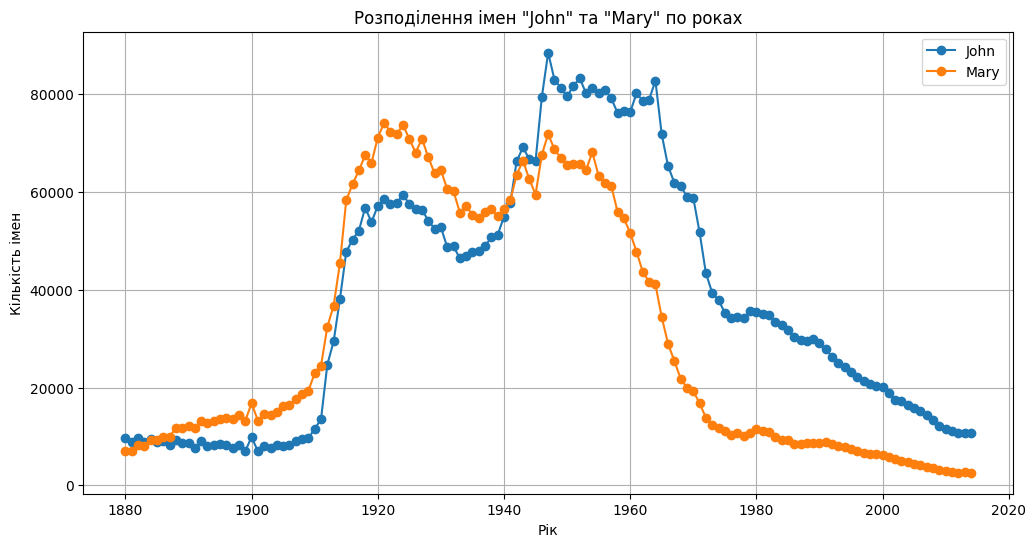

In [18]:
# Вправа 25 (графіки розподілення кількості імен John та Mary по роках без залежності до статі)
john_data = df[(df['Name'] == 'John')]
mary_data = df[(df['Name'] == 'Mary')]

john_counts = john_data.groupby('Year')['Count'].sum()
mary_counts = mary_data.groupby('Year')['Count'].sum()

plt.figure(figsize=(12, 6))
plt.plot(john_counts.index, john_counts.values, label='John', marker='o')
plt.plot(mary_counts.index, mary_counts.values, label='Mary', marker='o')

plt.title('Розподілення імен "John" та "Mary" по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість імен')
plt.legend()
plt.grid(True)

plt.show()

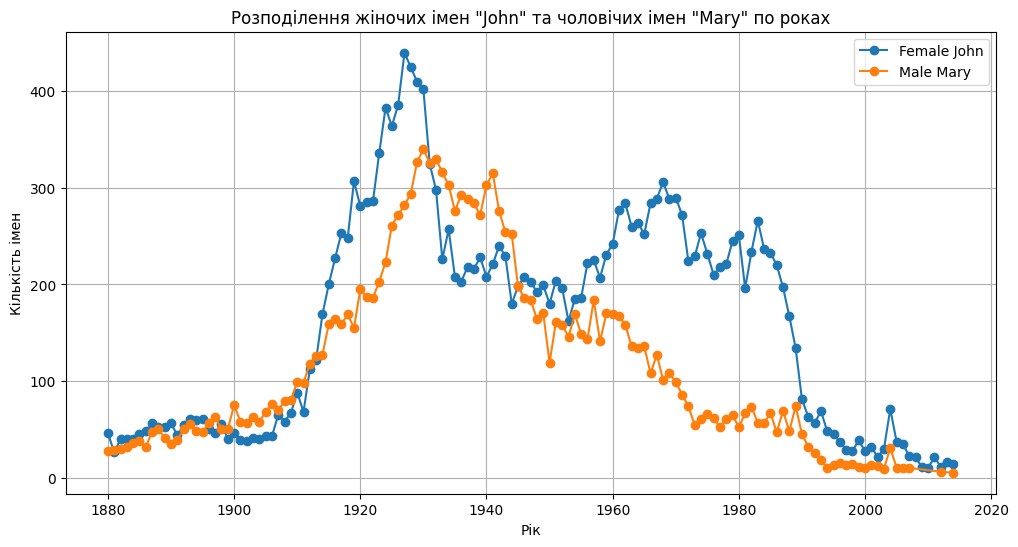

In [19]:
# Вправа 26 (графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.)
john_female_data = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]

# Відфільтруємо дані для імен "Mary" з чоловічою статтею
mary_male_data = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

# Згрупуємо дані по роках та обчислимо загальну кількість імен "John" та "Mary" для кожного року
john_female_counts = john_female_data.groupby('Year')['Count'].sum()
mary_male_counts = mary_male_data.groupby('Year')['Count'].sum()

# Побудуємо графіки
plt.figure(figsize=(12, 6))
plt.plot(john_female_counts.index, john_female_counts.values, label='Female John', marker='o')
plt.plot(mary_male_counts.index, mary_male_counts.values, label='Male Mary', marker='o')

plt.title('Розподілення жіночих імен "John" та чоловічих імен "Mary" по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість імен')
plt.legend()
plt.grid(True)

plt.show()

In [20]:
# Вправа 27 (найпопулярніші імена в кожному році)
popular_names_by_year = df.groupby("Year").apply(lambda x: x.loc[x["Count"].idxmax()])
print(popular_names_by_year[["Name", "Count"]])

          Name  Count
Year                 
1880      John   9655
1881      John   8769
1882      John   9557
1883      John   8894
1884      John   9388
...        ...    ...
2010  Isabella  22883
2011    Sophia  21816
2012    Sophia  22267
2013    Sophia  21147
2014      Emma  20799

[135 rows x 2 columns]
